In [24]:
pip install sklearn2pmml==0.108.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user -U scikit-learn==1.4.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn as sk
import pandas as pd
import sklearn2pmml

In [2]:
df = pd.read_csv("./data/kp/set-final.csv", dtype={"Generacion": int, "Numero de nodos": int, "Numero de funciones":int, "Numero de terminales":int, 
                                                 "Iteraciones Promedio DoWhile":int, "Profundidad":int, "Terminal Agregar":int, "Terminal Eliminar":int, "Terminal Mejora":int,
                                                 "ErrorRelativoPromedio":float,"Fitness":float,"Tiempo de Ejecucion Promedio(ms)":float })

In [3]:
X = df.drop(['score_aceptabilidad'], axis=1)
X.keys()

Index(['Generacion', 'Numero de Nodos', 'Numero de Terminales',
       'Numero de Funciones', 'Iteraciones Promedio DoWhile',
       'Terminal Agregar', 'Terminal Eliminar', 'Terminal Mejora',
       'Profundidad'],
      dtype='object')

In [4]:
Y = df['score_aceptabilidad']
display(Y)

0         1
1         1
2         1
3         1
4         1
         ..
499995    1
499996    1
499997    1
499998    1
499999    1
Name: score_aceptabilidad, Length: 500000, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.35, random_state=16)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn.svm import LinearSVC

pipeline = PMMLPipeline([
	("classifier", LogisticRegression(random_state=16,max_iter=1000))
])

#pipeline_svm = PMMLPipeline([
#    ("classifier", SVC(max_iter=1000, kernel="precomputed"))
#])
pipeline_svm = PMMLPipeline([
    ("classfier", LinearSVC())
])

pipeline_mlpc = PMMLPipeline([
    ("classifier", MLPClassifier(max_iter=1000, activation="relu"))
])


### Proceso de entremaniento modelo LogisticRegression

In [18]:
import time
start = time.time()
pipeline.fit(x_train, y_train)
end = time.time()
print(f"{end-start}s")

24.09728455543518s


In [8]:
y_pred = pipeline.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)

In [10]:
print(matriz)

[[165113    598]
 [  6436   2853]]


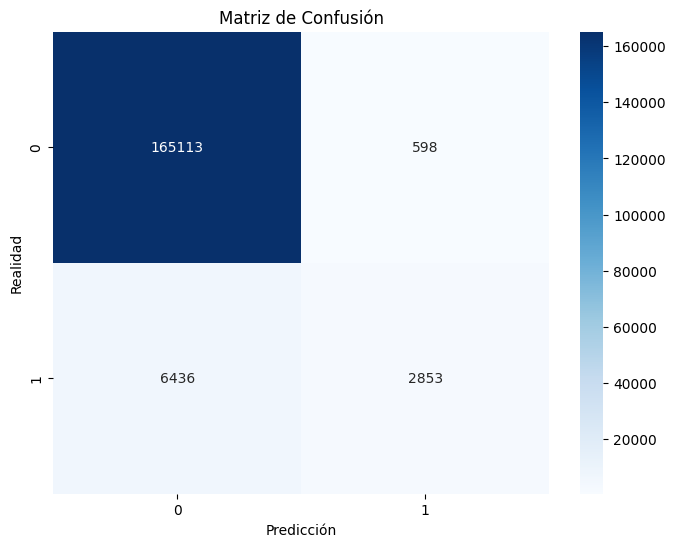

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

True Negatives (TN): 165113
False Positives (FP): 598
False Negatives (FN): 6436
True Positives (TP): 2853


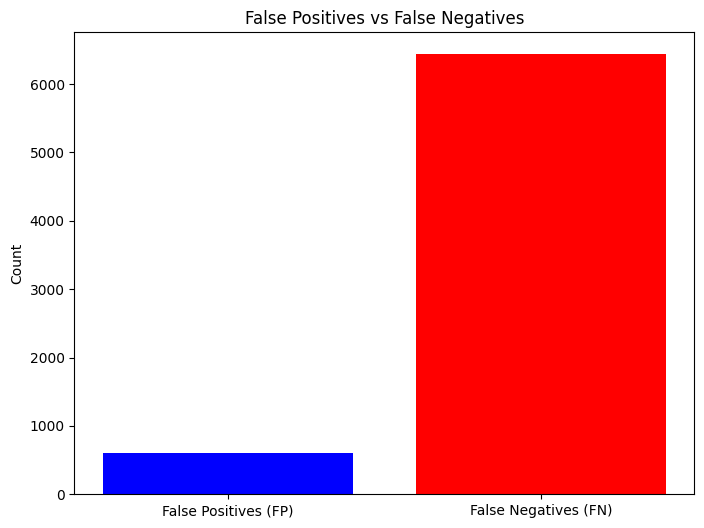

In [13]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report


# Extraer los valores de la matriz de confusión
TN, FP, FN, TP = matriz.ravel()

# Mostrar los valores
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Crear el gráfico de falsos positivos vs falsos negativos
labels = ['False Positives (FP)', 'False Negatives (FN)']
values = [FP, FN]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel('Count')
plt.title('False Positives vs False Negatives')
plt.show()

In [14]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.8267168936540134


In [15]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print(exactitud)

0.9598057142857143


In [16]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(recall)

0.307137474432124


In [17]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f1)

0.4478806907378336


### Entrenamiento de SVM

In [17]:
pipeline_svm.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


PMMLPipeline(steps=[('classfier', LinearSVC())])

In [18]:
svm_pred = pipeline_svm.predict(x_test)
matriz_svm = confusion_matrix(y_test, svm_pred)
exactitud = accuracy_score(y_test, svm_pred)
print(exactitud)

0.9601542857142857


True Negatives (TN): 7414
False Positives (FP): 8382
False Negatives (FN): 5564
True Positives (TP): 328640


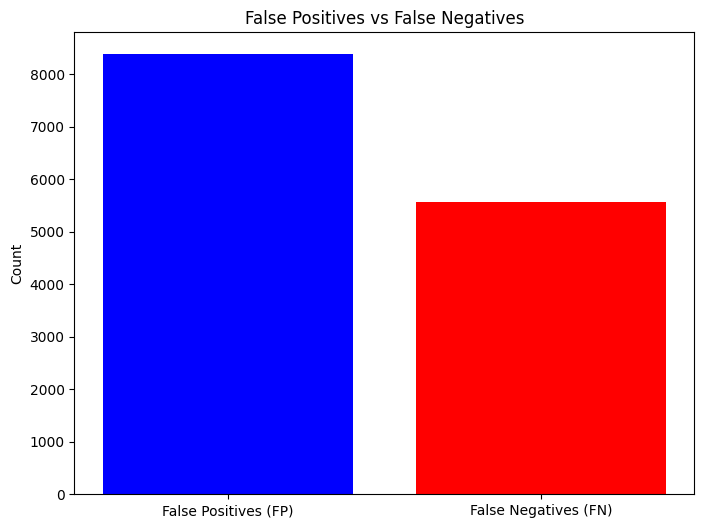

In [19]:
# Extraer los valores de la matriz de confusión
TN, FP, FN, TP = matriz_svm.ravel()

# Mostrar los valores
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Crear el gráfico de falsos positivos vs falsos negativos
labels = ['False Positives (FP)', 'False Negatives (FN)']
values = [FP, FN]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel('Count')
plt.title('False Positives vs False Negatives')
plt.show()

### Entrenamiento de MLP

In [20]:
pipeline_mlpc.fit(x_train, y_train)

PMMLPipeline(steps=[('classifier', MLPClassifier(max_iter=1000))])

In [33]:
mlpc_pred = pipeline_mlpc.predict(x_test)
matriz_mlpc = confusion_matrix(y_test, mlpc_pred)
exactitud_mlp = accuracy_score(y_test, mlpc_pred)
print(exactitud_mlp)

0.960088


In [19]:
from sklearn2pmml import sklearn2pmml

sklearn2pmml(pipeline, "LRKP.pmml", with_repr = True)

In [20]:
sklearn2pmml(pipeline_svm, "LSVCKP.pmml", with_repr = True)

In [21]:
sklearn2pmml(pipeline_mlpc, "MLPCKP.pmml", with_repr = True)

In [24]:
df = pd.read_csv("./data/kp/set4.csv", dtype={"Generacion": int, "Numero de nodos": int, "Numero de funciones":int, "Numero de terminales":int, 
                                                 "Iteraciones Promedio DoWhile":int, "Profundidad":int, "Terminal Agregar":int, "Terminal Eliminar":int, "Terminal Mejora":int,
                                                 "ErrorRelativoPromedio":float,"Fitness":float,"Tiempo de Ejecucion Promedio(ms)":float })

X2 = df.drop(['score_aceptabilidad'], axis=1)
Y2 = Y = df['score_aceptabilidad']

In [25]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size=0.99, random_state=16)

In [26]:
test_pred = pipeline.predict(x2_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
-  Iteraciones Promedio DoWhile
-  Numero de funciones
-  Numero de nodos
-  Numero de terminales
-  Profundidad
- ...
Feature names seen at fit time, yet now missing:
- Iteraciones Promedio DoWhile
- Numero de Funciones
- Numero de Nodos
- Numero de Terminales
- Profundidad
- ...


In [38]:
matriz2 = confusion_matrix(y2_test, test_pred)
precision2 = precision_score(y2_test, test_pred)
exactitud2 = accuracy_score(y2_test, test_pred)
print("Matriz de Confusion: ")
print(matriz2)
print("Precision: ")
print(precision2)
print("Exactitud: ")
print(exactitud2)

Matriz de Confusion: 
[[102489   2159]
 [ 23021  23906]]
Precision: 
0.9171686169192403
Exactitud: 
0.8338776183407554
